# EDA Project

**1.** Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

 **2.** Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.
 
**3.** Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

**Answer the following questions using the clean dataset by plotting suitable graphs:**
    
**4.** What is the distribution of sales among different cities in different months?

**a)** Which city had the highest sales overall? 

**b)** Which Month had the highest amount of sales overall?

**c)** Most bought products per city.

**Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.**

**5.** Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;

**a)** What products are mostly sold at different times of the day?

**b)** Which time of day has the most sales?

**Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.**

**6.** Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

**1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.**

In [100]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [101]:
# LOAD DATASET INTO PANDAS

de = pd.read_csv(r"C:\Users\chefr\Desktop\all_data_copy.csv")
de

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [102]:
de.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [103]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [104]:
de.duplicated().value_counts()

True     188012
False    185688
dtype: int64

In [105]:
de.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


In [106]:
de.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

# DATA CLEANING

**2. Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.**

In [107]:
de = de.drop_duplicates(keep = 'first')
de

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [108]:
de.shape

(185688, 6)

In [109]:
de.dropna(inplace=True)

In [110]:
de.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [111]:
de.columns = ['Order_Id','Product','Quantity_Ordered','Price_Each','Order_Date','Purchase_Address']
de.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [112]:
de['Date'] = de['Order_Date'].str[:8]
de['Month'] = de['Order_Date'].str[:2]
de

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01/22/19,01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01/28/19,01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01/17/19,01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01/05/19,01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01/25/19,01
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12/11/19,12
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12/01/19,12
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12/09/19,12
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12/03/19,12


In [113]:
de.Month.value_counts()

12    24944
10    20249
04    18257
11    17544
05    16552
03    15128
07    14275
06    13535
02    11957
08    11943
09    11603
01     9699
Or        1
Name: Month, dtype: int64

In [114]:
de = de[de['Order_Date'].str[:2] != 'Or']
de.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01/22/19,01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01/28/19,01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01/17/19,01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01/05/19,01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01/25/19,01


In [115]:
de['Order_Date'] = pd.to_datetime(de['Order_Date'])

In [116]:
de['Date'] = pd.to_datetime(de['Date'])
de['Month'] = de['Month'].astype('int32')

In [117]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  object        
 3   Price_Each        185686 non-null  object        
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   Date              185686 non-null  datetime64[ns]
 7   Month             185686 non-null  int32         
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 12.0+ MB


In [118]:
de['Month'] = de.Date.dt.month
de['Year'] = de.Date.dt.year
de['date'] = de.Date.dt.day
de

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Month,Year,date
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,2019,22
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,2019,28
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,2019,17
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,2019,5
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,2019,25
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,12,2019,11
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,12,2019,1
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,12,2019,9
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,12,2019,3


In [119]:
de.Order_Id.value_counts()

160873    5
295681    4
277875    4
263918    4
312407    4
         ..
305301    1
143660    1
316656    1
222309    1
159946    1
Name: Order_Id, Length: 178437, dtype: int64

In [120]:
de.Price_Each.value_counts()

11.95     21859
14.95     21610
2.99      20612
3.84      20558
11.99     18849
150       15426
99.99     13298
149.99     7498
700        6802
389.99     6225
379.99     6174
600        5487
300        4774
1700       4699
999.99     4126
109.99     4098
400        2056
600.0      1347
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: Price_Each, dtype: int64

In [123]:
de['Quantity_Ordered']=de['Quantity_Ordered'].astype('int32')
de['Price_Each']=de['Price_Each'].astype('float64')
de['Month']=de['Month'].astype('int32')
de['Year']=de['Year'].astype('int32')

In [124]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int32         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   Date              185686 non-null  datetime64[ns]
 7   Month             185686 non-null  int32         
 8   Year              185686 non-null  int32         
 9   date              185686 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(1), object(3)
memory usage: 13.5+ MB


In [125]:
de[['Home_No','City','Pin_code']]=de.Purchase_Address.str.split(",",expand=True)
de.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Month,Year,date,Home_No,City,Pin_code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,2019,22,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,2019,28,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,2019,17,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,2019,5,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,2019,25,387 10th St,Austin,TX 73301


In [126]:
de['Sales']=de['Quantity_Ordered'] * de['Price_Each']
de.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Month,Year,date,Home_No,City,Pin_code,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,1,2019,22,944 Walnut St,Boston,MA 02215,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,1,2019,28,185 Maple St,Portland,OR 97035,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,1,2019,17,538 Adams St,San Francisco,CA 94016,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,1,2019,5,738 10th St,Los Angeles,CA 90001,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,1,2019,25,387 10th St,Austin,TX 73301,11.99


In [127]:
de['Sales']=de['Sales'].astype('int32')
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int32         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   Date              185686 non-null  datetime64[ns]
 7   Month             185686 non-null  int32         
 8   Year              185686 non-null  int32         
 9   date              185686 non-null  int64         
 10  Home_No           185686 non-null  object        
 11  City              185686 non-null  object        
 12  Pin_code          185686 non-null  object        
 13  Sales             185686 non-null  int32         
dtypes: d

In [128]:
city = de[['City','Sales','Month']].groupby(['City','Month'],as_index=False).agg('sum')
city.head()

,City,Month,Sales
0,Atlanta,1,148584
1,Atlanta,2,175772
2,Atlanta,3,230711
3,Atlanta,4,283361
4,Atlanta,5,237867


In [129]:
Atlanta = city.iloc[:12,1:]



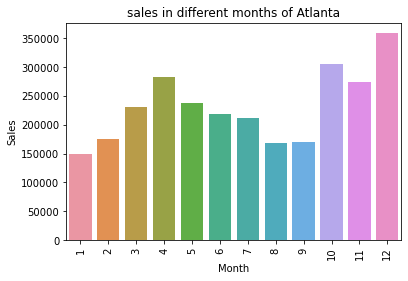

In [149]:

#Atlanta
Atlanta1 = sns.barplot(x=Atlanta.Month,y=Atlanta.Sales)
plt.setp(Atlanta1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Atlanta')

plt.show()



In [ ]:
Austin = city.iloc[12:24,1:]

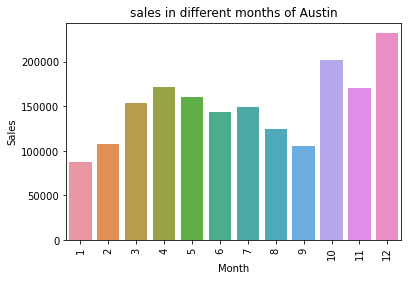

In [150]:
#Austin

Austin1 = sns.barplot(x=Austin.Month,y=Austin.Sales)
plt.setp(Austin1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Austin')

plt.show()

In [132]:
Boston = city.iloc[24:36,1:]


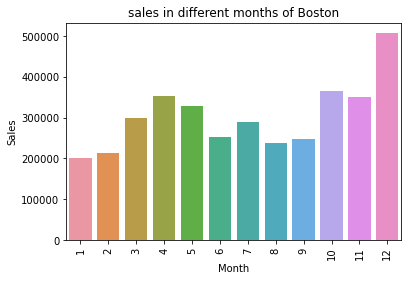

In [151]:

#Boston

Boston1 = sns.barplot(x=Boston.Month,y=Boston.Sales)
plt.setp(Boston1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Boston')

plt.show()



In [ ]:
Dallas = city.iloc[36:48,1:]

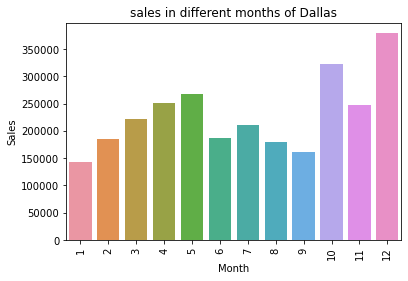

In [152]:
Dallas1 = sns.barplot(x=Dallas.Month,y=Dallas.Sales)
plt.setp(Dallas1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Dallas')

plt.show()

In [134]:
Los_angeles = city.iloc[48:60,1:]


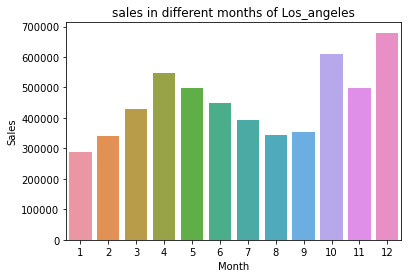

In [153]:
#Los_angeles

Los_angeles1 = sns.barplot(x=Los_angeles.Month,y=Los_angeles.Sales)
plt.setp(Dallas1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Los_angeles')

plt.show()



In [145]:
Portland = city.iloc[72:84,1:]


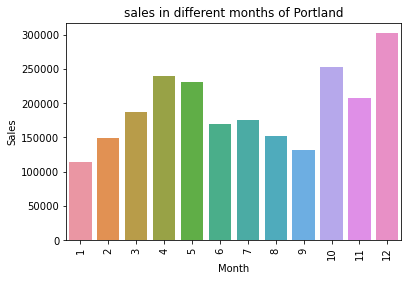

In [148]:
Portland1 = sns.barplot(x=Portland.Month,y=Portland.Sales)
plt.setp(Portland1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Portland')

plt.show()

In [ ]:
San_Francisco= city.iloc[84:96,1:]

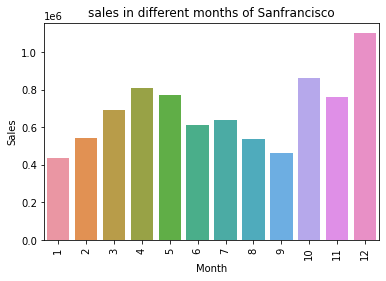

In [155]:
San_Francisco1 = sns.barplot(x=San_Francisco.Month,y=San_Francisco.Sales)
plt.setp(San_Francisco1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Sanfrancisco')

plt.show()

In [139]:
Seattle = city.iloc[96:108,1:]


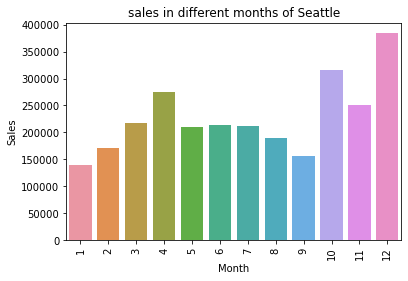

In [154]:
Seattle1=sns.barplot(x=Seattle.Month,y=Seattle.Sales)
plt.setp(Seattle1.get_xticklabels(),rotation=90)
plt.title('sales in different months of Seattle')

plt.show()

In [173]:
city = de[['City','Sales']].groupby(['City'],as_index = False).agg('sum')
city

,City,Sales
0,Atlanta,2783272
1,Austin,1810770
2,Boston,3643916
3,Dallas,2754436
4,Los Angeles,5426396
5,New York City,4643476
6,Portland,2310147
7,San Francisco,8221735
8,Seattle,2734186


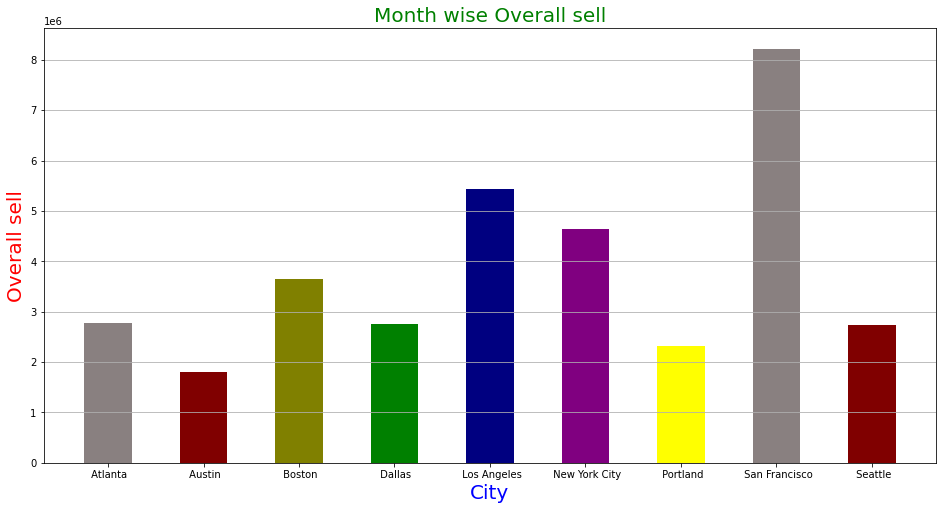

In [174]:
plt.figure(figsize=(16,8))
plt.bar(city['City'],city['Sales'],color=['#898080','#800000','#808000','#008000','#000080','#800080','yellow'],width=0.5)
plt.xlabel("City",size=20,color='Blue')
plt.ylabel('Overall sell',size=20,color='red')
plt.title("Month wise Overall sell",size=20,color='green')
plt.grid(axis='y')

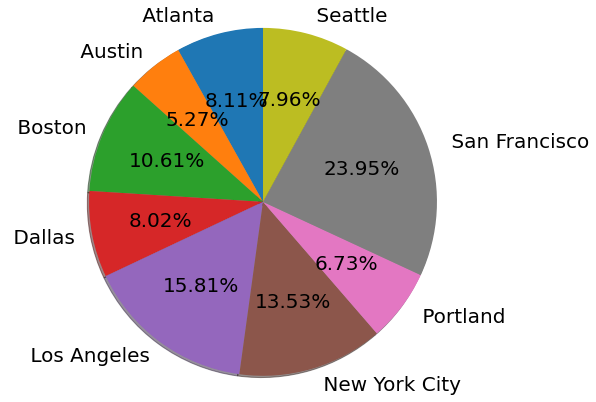

In [175]:
# TO GET BETTER VISUALIZATION,LETS GO TO PIE CHART

city_name = city['City']
textprops = {"fontsize":20}

plt.pie(city['Sales'],labels = city_name, autopct = '%1.2f%%' , radius = 2, startangle = 90, shadow = True,textprops = textprops)
plt.show()

In [168]:
month = de[['Month','Sales']].groupby(['Month'],as_index=False).agg('sum')
month.head(12)

,Month,Sales
0,1,1814307
1,2,2191236
2,3,2793798
3,4,3375781
4,5,3138397
5,6,2566364
6,7,2635911
7,8,2232298
8,9,2085833
9,10,3719695


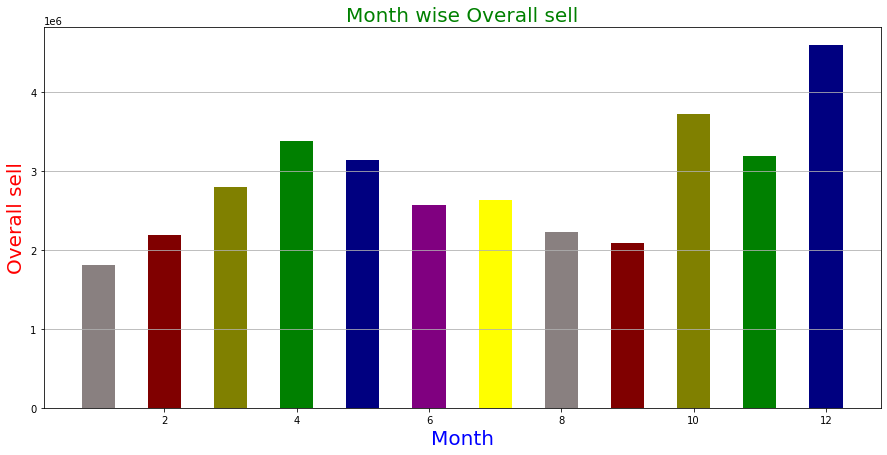

In [171]:
plt.figure(figsize=(15,7))
plt.bar(month['Month'],month['Sales'],color=['#898080','#800000','#808000','#008000','#000080','#800080','yellow'],width=0.5)
plt.xlabel("Month",size=20,color='Blue')
plt.ylabel('Overall sell',size=20,color='red')
plt.title("Month wise Overall sell",size=20,color='green')
plt.grid(axis='y')

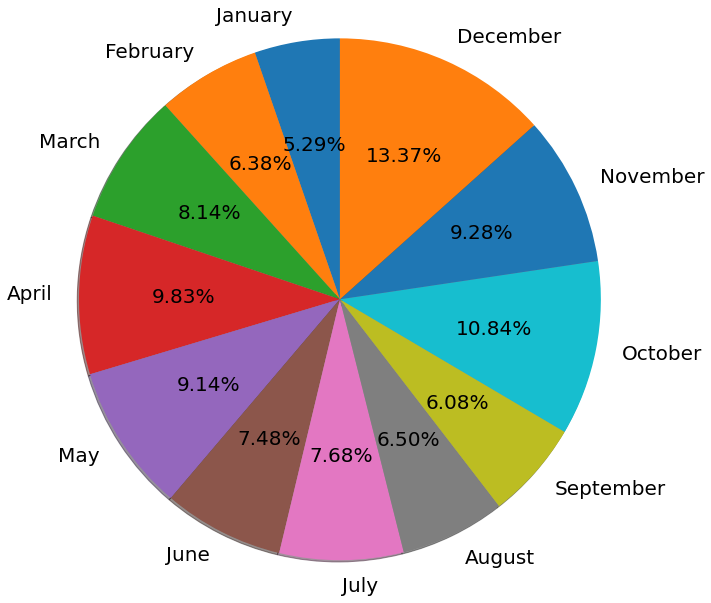

In [177]:
month_name = ['January','February','March','April','May','June','July','August','September','October','November','December']
textprops = {"fontsize":20}

plt.pie(month['Sales'],labels = month_name, autopct = '%1.2f%%' , radius = 3, startangle = 90, shadow = True,textprops = textprops)
plt.show()